Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Load Dataset

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Advertising.csv")

Saving Advertising.csv to Advertising.csv


Data Exploration

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.shape

(200, 5)

Data Cleaning

In [7]:
print(df.isnull().sum())  # check missing
df = df.dropna()  # drop missing if any


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [8]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Features & Target

In [9]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

Train-Test Split


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Models
1. Linear Regression
2. Random Forest


In [11]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=200, random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

Predictions

In [12]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

Evaluation

In [13]:
print("\n--- Linear Regression ---")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

print("\n--- Random Forest ---")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


--- Linear Regression ---
R2 Score: 0.899438024100912
RMSE: 1.78159966153345

--- Random Forest ---
R2 Score: 0.9818333477552758
RMSE: 0.7572349907723515


Correlation Heatmap

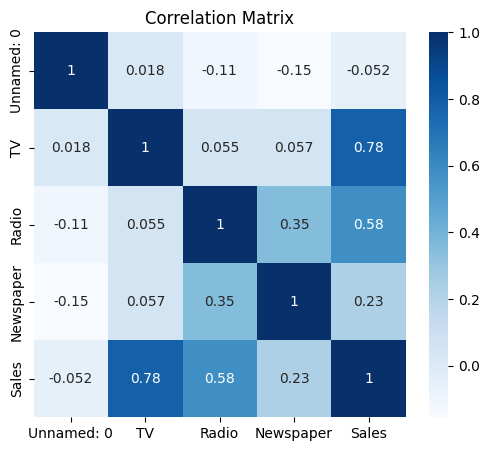

In [28]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

Actual vs Predicted (Linear Regression)


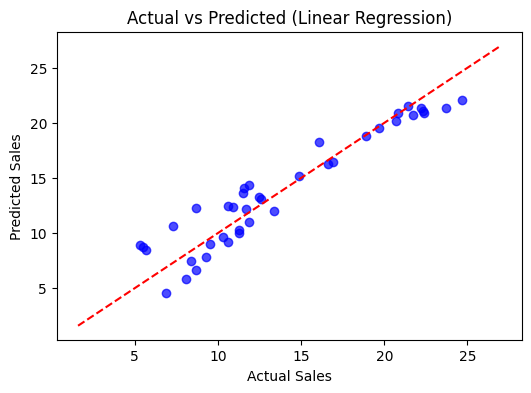

In [37]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color="blue")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted (Linear Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

Residual Plot

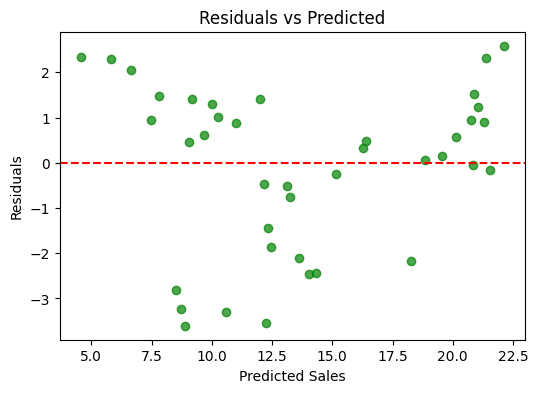

In [36]:
residuals = y_test - y_pred_lr
plt.figure(figsize=(6,4))
plt.scatter(y_pred_lr, residuals, alpha=0.7, color="green")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

Residuals Histogram

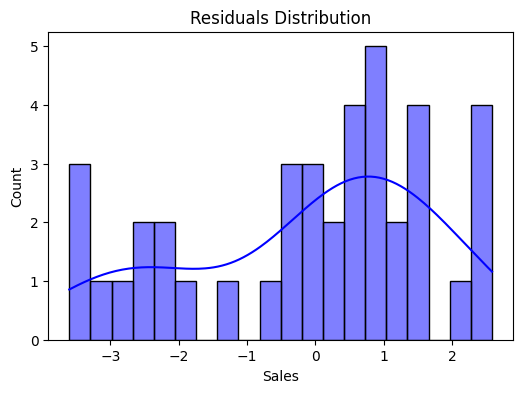

In [35]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=20, kde=True, color="blue")
plt.title("Residuals Distribution")
plt.show()

Feature Importance (Linear Regression Coefficients)

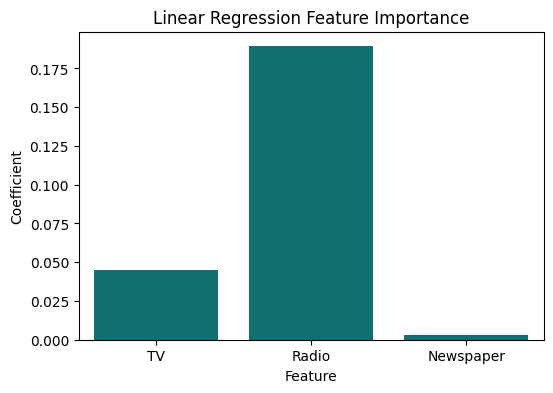

In [34]:
importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})
plt.figure(figsize=(6,4))
sns.barplot(data=importance_lr, x="Feature", y="Coefficient", color="teal")
plt.title("Linear Regression Feature Importance")
plt.show()


Feature Importance (Random Forest)

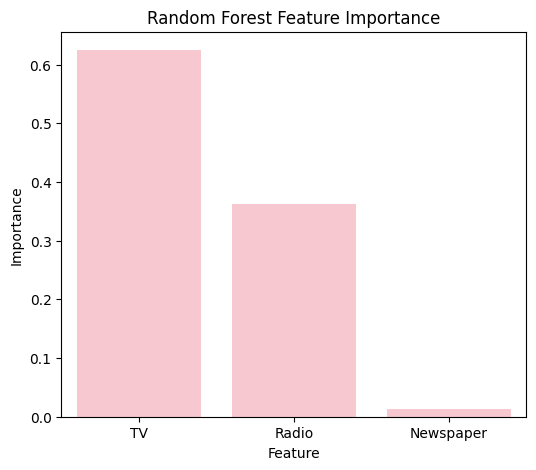

In [24]:
importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(6,5))
sns.barplot(data=importance_rf, x="Feature", y="Importance", color="pink")
plt.title("Random Forest Feature Importance")
plt.show()


Sensitivity Analysis – Impact of TV

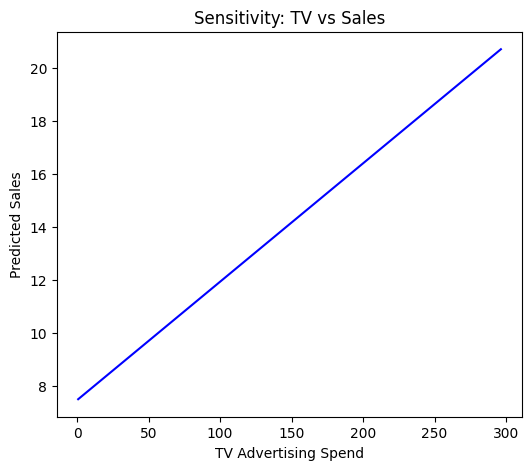

In [20]:
tv_range = np.linspace(X['TV'].min(), X['TV'].max(), 100)
X_example = pd.DataFrame({
    'TV': tv_range,
    'Radio': X['Radio'].mean(),
    'Newspaper': X['Newspaper'].mean()
})
y_tv = lr.predict(X_example)

plt.figure(figsize=(6,5))
plt.plot(tv_range, y_tv, color="blue")
plt.xlabel("TV Advertising Spend")
plt.ylabel("Predicted Sales")
plt.title("Sensitivity: TV vs Sales")
plt.show()